In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# visualizing data
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('hotel_bookings 2.csv')

 # EXPLORATORY DATA ANALYSIS AND DATA CLEANING

In [3]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [8]:
#changing the datatype
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [9]:
df.drop(['company', 'agent'], axis=1, inplace=True)
df.dropna(inplace=True)

In [10]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

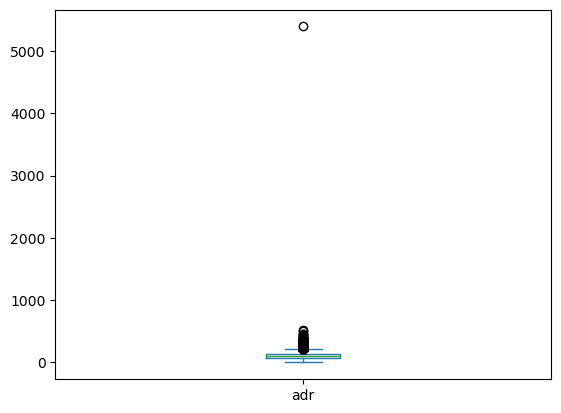

In [11]:
df['adr'].plot(kind='box')

In [12]:
#REMOVING THE OUTLIER IN ADR

df=df[df['adr']<5000]

# DATA ANALYSIS AND VISUALISATION

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

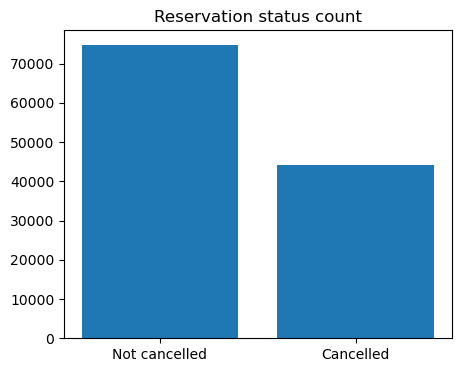

In [13]:
cancelled_perc=df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled', 'Cancelled'],df['is_canceled'].value_counts())
plt.show

In [14]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Text(0, 0.5, 'number of reservations')

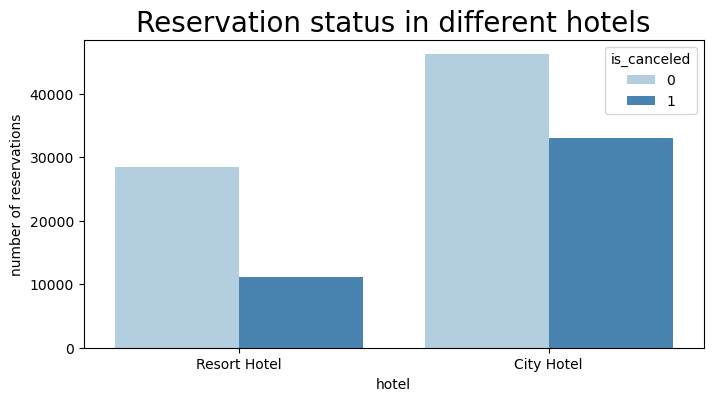

In [15]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
plt.title('Reservation status in different hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')


In [16]:
resort_hotel=df[df['hotel']=='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [17]:
city_hotel=df[df['hotel']=='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)


0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [18]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

<function matplotlib.pyplot.show(close=None, block=None)>

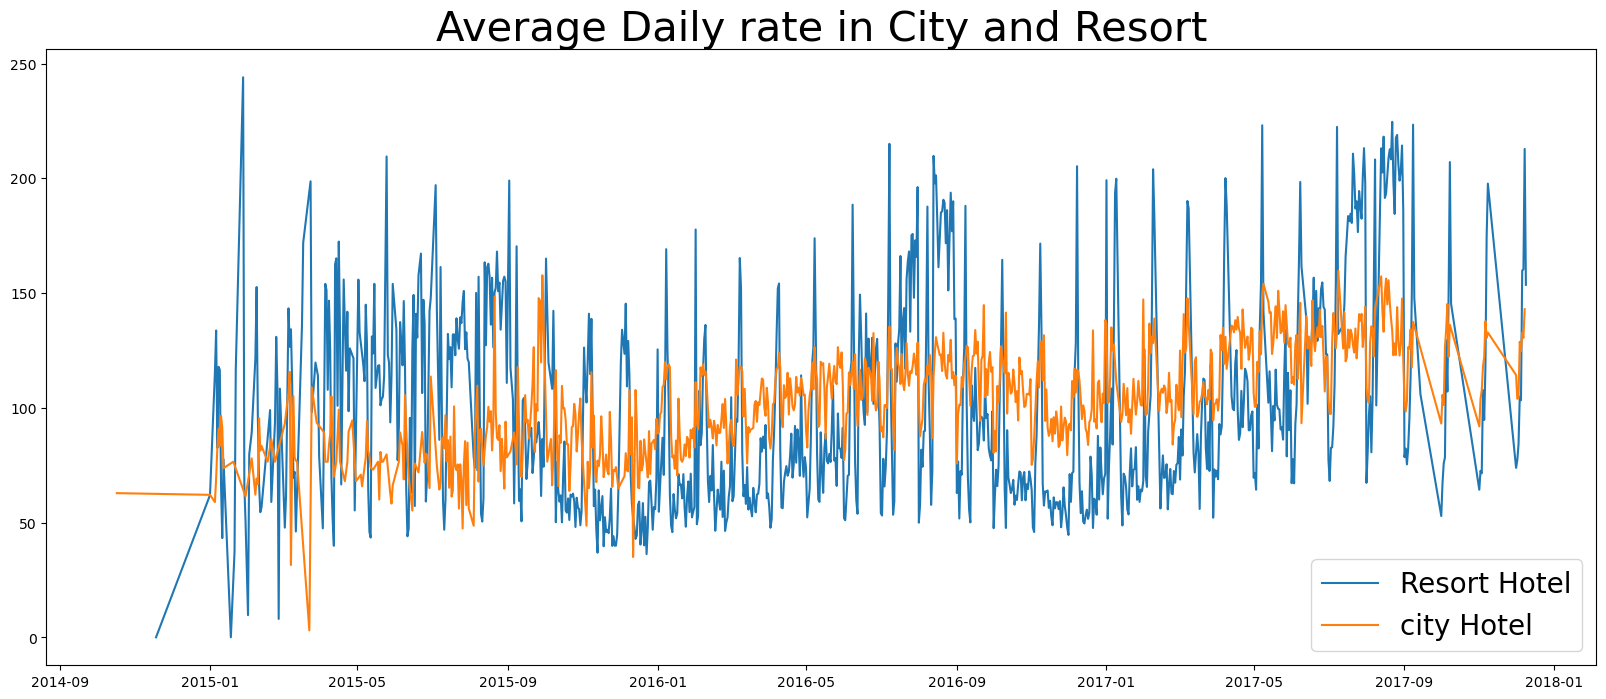

In [19]:

plt.figure(figsize=(20,8))
plt.title('Average Daily rate in City and Resort', fontsize=30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label='Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label='city Hotel')
plt.legend(fontsize=20)
plt.show



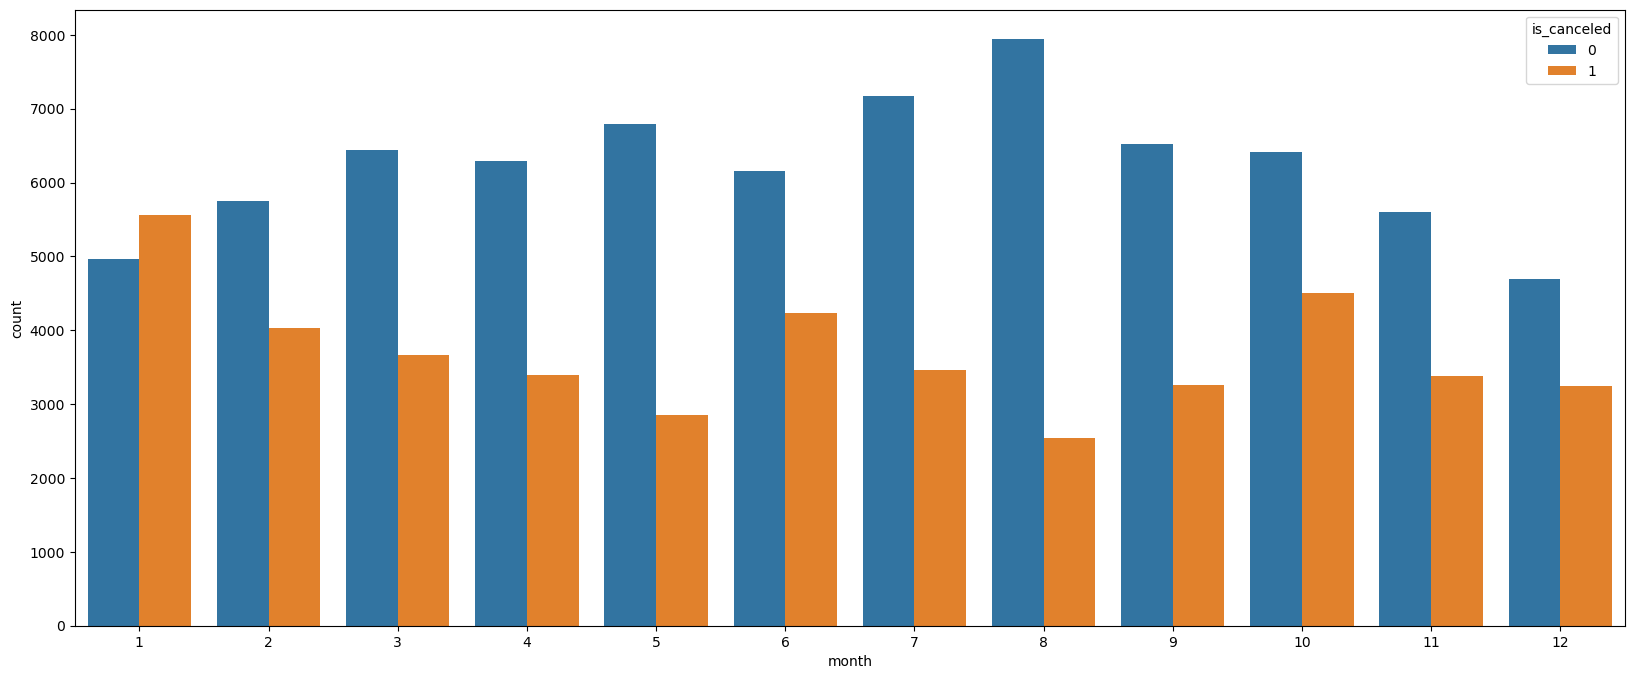

In [20]:
#higher booking, lower cancellation
df['month']=df['reservation_status_date'].dt.month
plt.figure(figsize=(20,8))
ax1=sns.countplot(x='month', hue='is_canceled', data=df)


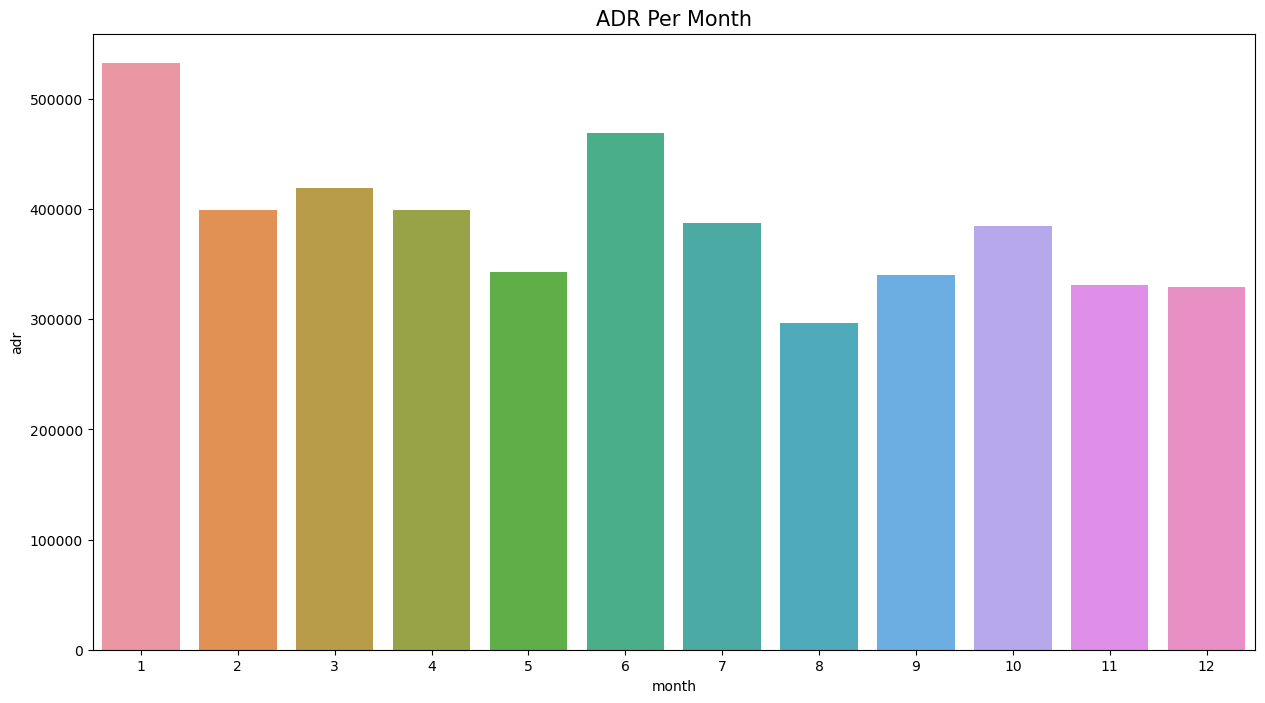

In [21]:
#here we use reset index because when we group by it will give a series or grouped result, which cannot be directly used
#to plot, hence reset index changes it to a dataframe so that it is easier to plot
#here we will try to understand if it is the price that is affecting the cancellation rate
plt.figure(figsize=(15, 8))
plt.title('ADR Per Month', fontsize=15)
sns.barplot(x='month', y='adr', data=df[df['is_canceled']==1].groupby('month')['adr'].sum().reset_index())
plt.show()
##from here we see higher the price, higher the cancellation

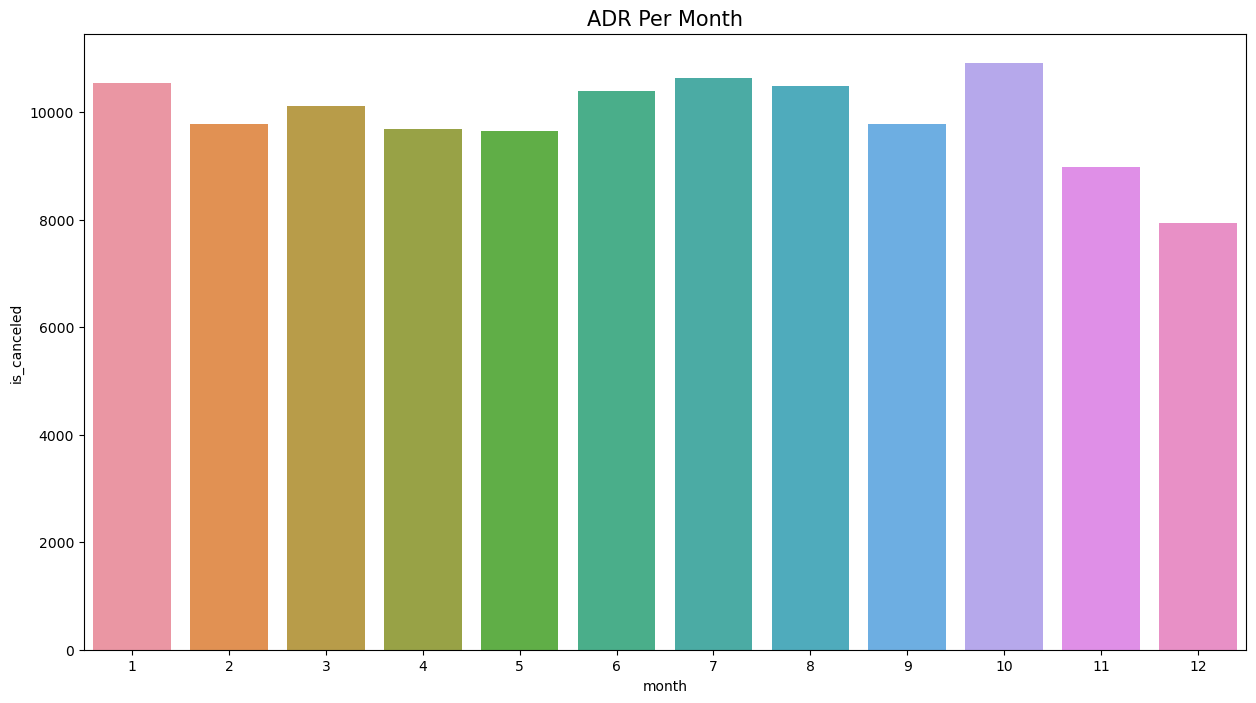

In [22]:
#total reservation plot=adding the cancelled and not cancelled booking
plt.figure(figsize=(15, 8))
plt.title('ADR Per Month', fontsize=15)
sns.barplot(x='month', y='is_canceled', data=df.groupby('month')['is_canceled'].count().reset_index())
plt.show()


In [23]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

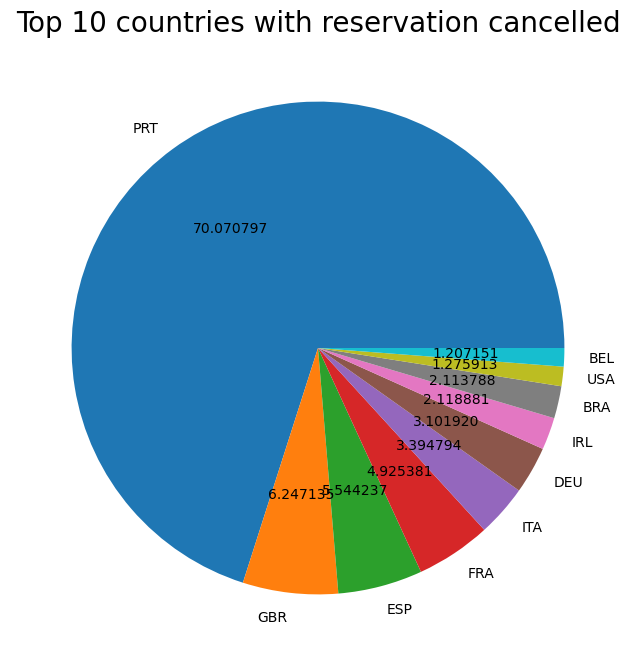

In [24]:
#here we see that Portugal has the highest rate of cancellation
cancelled_data=df[df['is_canceled']==1]
top_10_countries=cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation cancelled', fontsize=20)
plt.pie(top_10_countries, autopct='%2f', labels=top_10_countries.index)
plt.show()

In [25]:
#The number of bookings coming from each channels
df['market_segment'].value_counts(normalize=True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [26]:
#cancellation rate coming from different channels
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

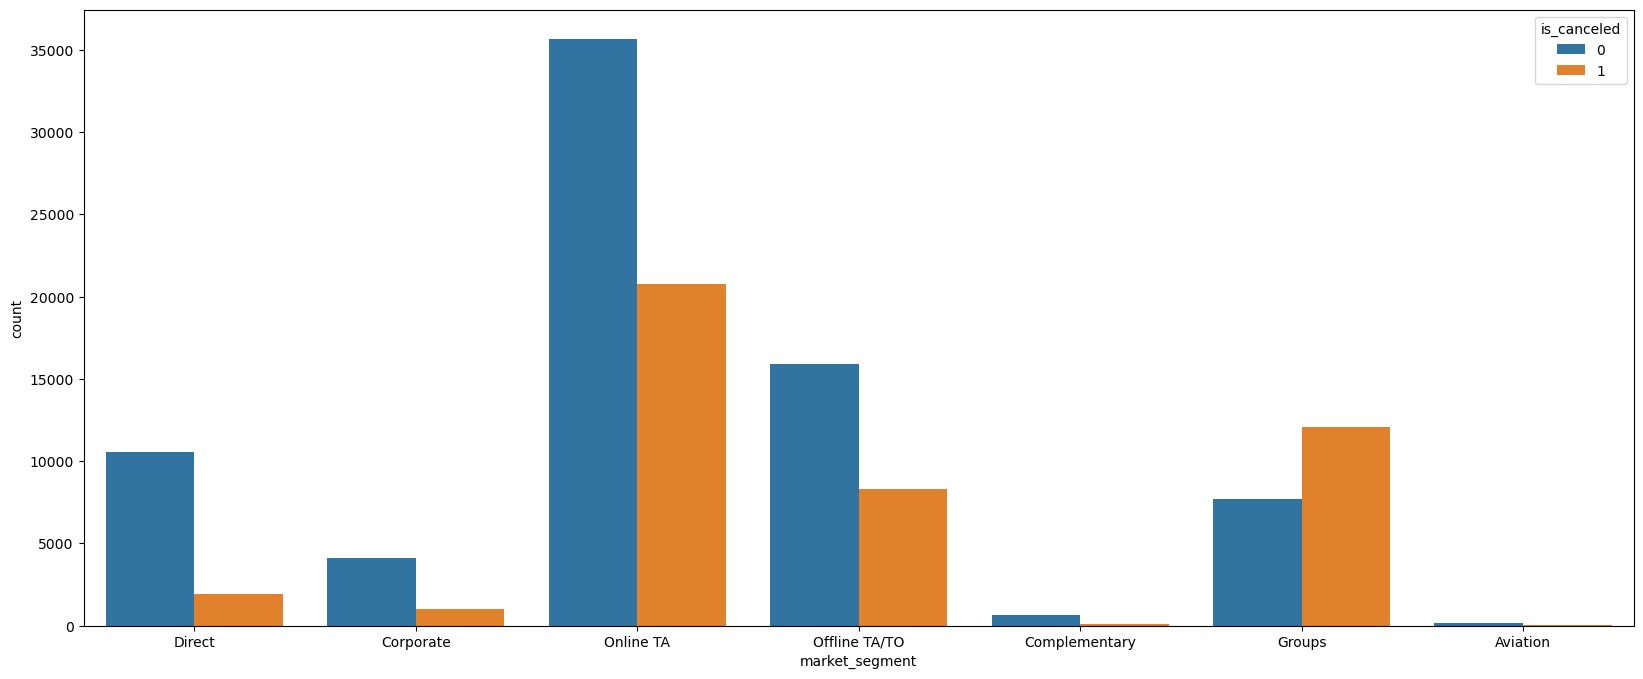

In [27]:
#graphical representation of cancellation count for each segment
plt.figure(figsize=(20,8))
ax1=sns.countplot(x='market_segment', hue='is_canceled', data=df)

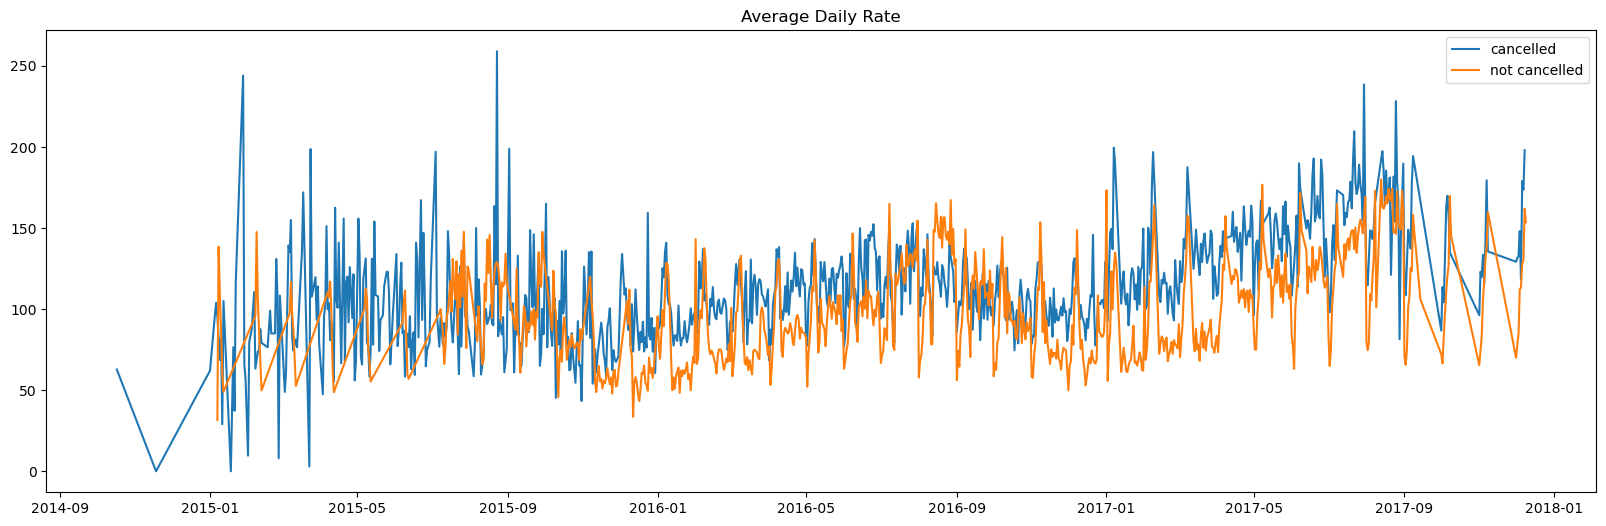

In [28]:
#ADR values for cancelled and not cancelled data
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index()
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

non_cancelled_data = df[df['is_canceled'] == 0]
non_cancelled_df_adr = non_cancelled_data.groupby('reservation_status_date')['adr'].mean().reset_index()
non_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.plot(non_cancelled_df_adr['reservation_status_date'], non_cancelled_df_adr['adr'], label='not cancelled')
plt.legend()
plt.show()


In [29]:
#lets try to use only 2 years details
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]

non_cancelled_df_adr = non_cancelled_df_adr[(non_cancelled_df_adr['reservation_status_date'] > '2016') & (non_cancelled_df_adr['reservation_status_date'] < '2017-09')]


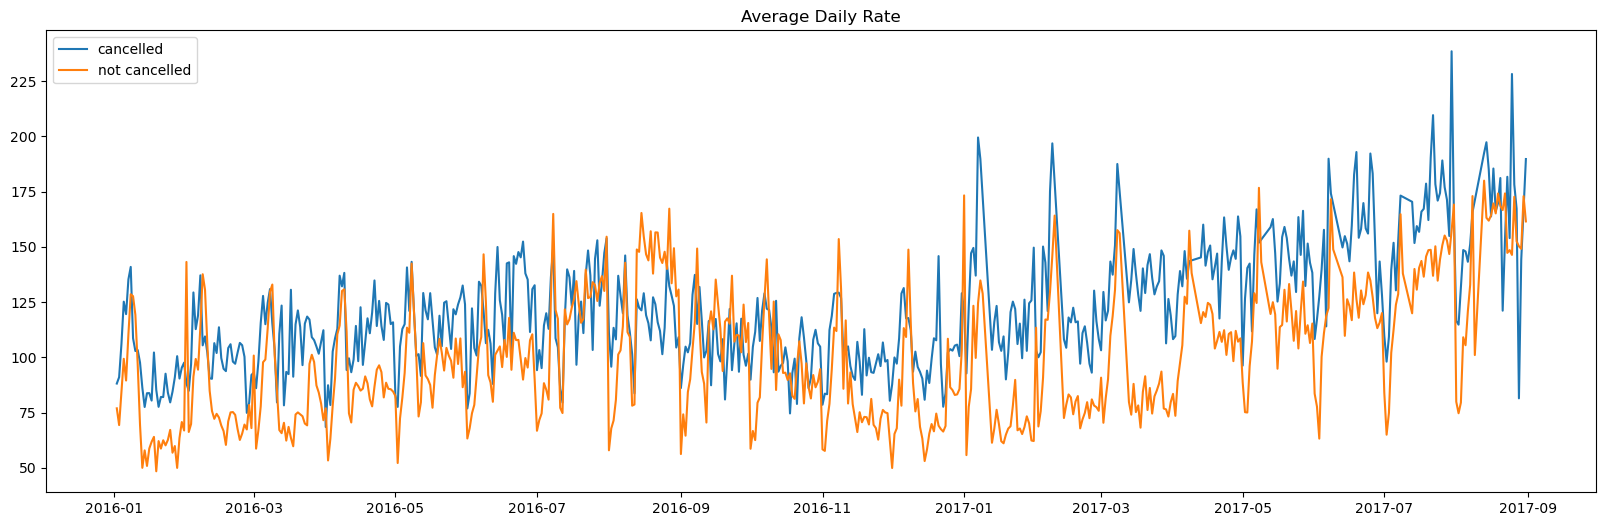

In [30]:
plt.figure(figsize=(20, 6))
plt.title('Average Daily Rate')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label='cancelled')
plt.plot(non_cancelled_df_adr['reservation_status_date'], non_cancelled_df_adr['adr'], label='not cancelled')
plt.legend()
plt.show()
